In [1]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

In [3]:
# generate data for Logistic Regression
torch.manual_seed(42)
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
x_tensor = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
y_tensor = torch.cat([Y1, Y2], dim=0)

dataset = CustomDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [1500, 500])

train_loader = DataLoader(dataset=train_dataset, batch_size=20)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

In [4]:
class LogisticModel(torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(50, 1)
    
     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [5]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    
    return train_step

In [6]:
torch.manual_seed(42)
model = LogisticModel()
lr = 0.01
n_epochs = 20

loss_fn = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr)

losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
#         x_batch = x_batch
#         y_batch = y_batch

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    with torch.no_grad():
        for x_val, y_val in val_loader:
#             x_val = x_val
#             y_val = y_val
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

C:\Users\fys86\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
C:\Users\fys86\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


OrderedDict([('linear.weight', tensor([[ 0.1339,  0.1043,  0.0232,  0.0746,  0.0409,  0.0952,  0.0549,  0.1423,
          0.1346,  0.1059,  0.1054,  0.0840,  0.1116,  0.0964,  0.0884,  0.1023,
          0.1771,  0.0907,  0.1764,  0.1390,  0.0708,  0.0712,  0.1298,  0.0545,
          0.0542, -0.0223,  0.0079,  0.1248,  0.0562,  0.0930,  0.0562,  0.0181,
          0.0871,  0.1634,  0.1059,  0.0897,  0.0588,  0.1557,  0.1518,  0.0477,
          0.1491,  0.0345,  0.0828,  0.1419,  0.1189,  0.0442,  0.1066,  0.0746,
          0.1516, -0.0256]])), ('linear.bias', tensor([-1.9074]))])


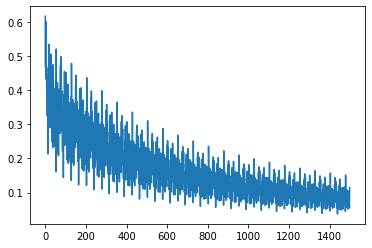

In [7]:
plt.plot(losses)

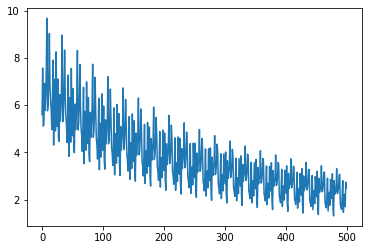

In [8]:
plt.plot(val_losses)